In [1]:
# Libraries
import pandas as pd
import numpy as np

# Preprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Data Splitting
from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modeling 
from sklearn.cluster import KMeans

# Resample
from imblearn.combine import SMOTEENN

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, recall_score,precision_score,f1_score

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# XgBoost
from xgboost import XGBClassifier

from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint, pointbiserialr
from sklearn.preprocessing import QuantileTransformer

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Preprocess

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 1.1 Check and Adjust the data type

Data type conversion: The variable of **TotalCharges** should be numberical. 

In [6]:
# Converting Total Charges to a numerical data type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## 1.2 Check and Adjust the Missing Value

In [8]:
# Check for NaN values in 'TotalCharges'
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# drop missing value and customerID 
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)

In [10]:
# Check for NaN values in 'TotalCharges' again
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1.3 Create Dummy Variables and Convert 'Churn' from Yes/No to 1/0

In [11]:
# Check the unique value for each object datatype
for column in df.select_dtypes(include = 'object').columns:
    print(f"{column}: {df[column].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [12]:
df1 = df.iloc[:,0:]

In [13]:
# Convert 'Churn' from Yes/No to 1/0
df1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df1['Churn'].replace(to_replace='No',  value=0, inplace=True)

df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [14]:
df_dummies = pd.get_dummies(df1)
df_dummies.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

## 1.4 Convert Boolean Columns to Binary (1/0)

In [15]:
# Convert boolean columns to binary (1/0) in the DataFrame 'df'
for column in df_dummies.select_dtypes(include=['bool']).columns:
    df_dummies[column] = df_dummies[column].astype(int)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   int64  
 6   gender_Male                              7032 non-null   int64  
 7   Partner_No                               7032 non-null   int64  
 8   Partner_Yes                              7032 non-null   int64  
 9   Dependents_No                            7032 non-null   int64  
 10  Dependents_Yes                           7032 non-nul

# 2. EDA

## 2.1 Summary of Statistics

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
print(df.describe(include=['O']))

       gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7032    7032       7032         7032          7032            7032   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3549    3639       4933         6352          3385            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7032         7032             7032        7032        7032   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3497         3087             3094        3472        2809   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7032            7032             7032              7032   
unique               3               3                

### 2.1.1 The proportion of churn customers

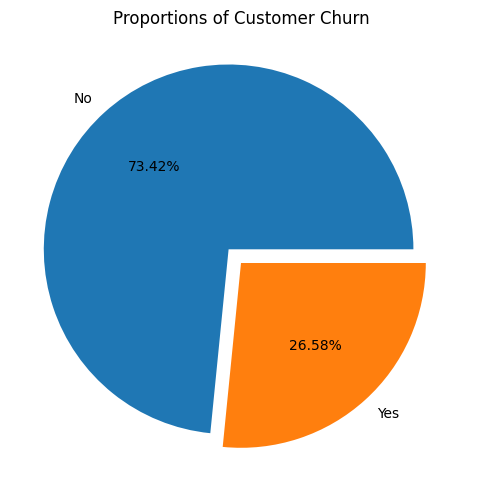

In [18]:
plt.figure(figsize=(6,6))
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Proportions of Customer Churn')
plt.show()

### 2.1.3 The impact of Gender, Partner, Dependents on customer churn

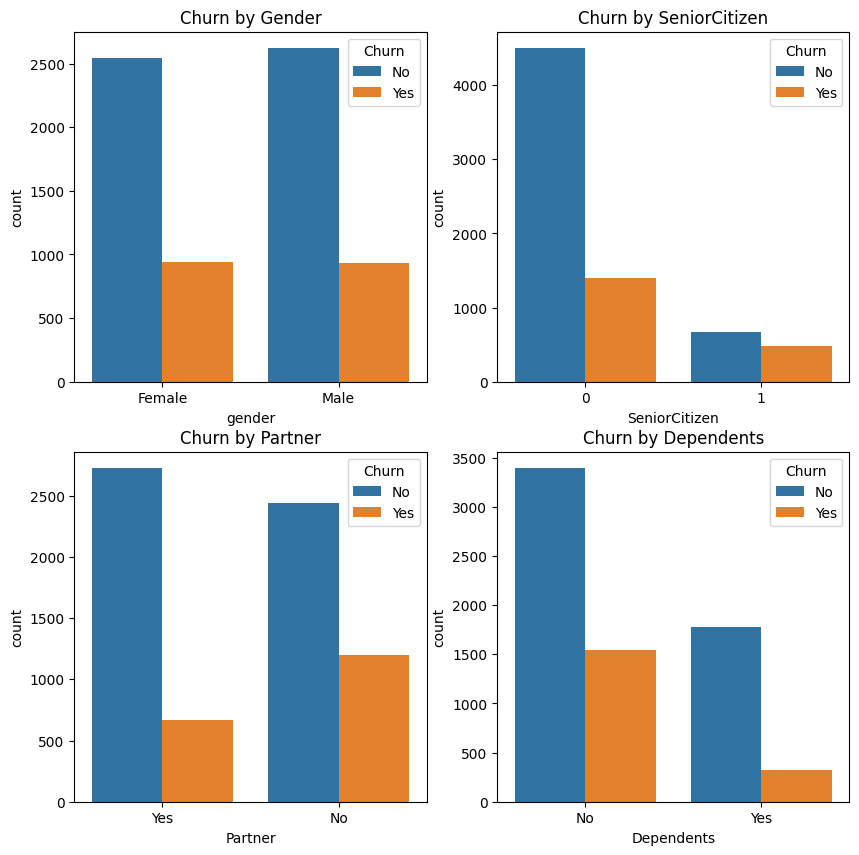

In [19]:
plt.figure(figsize=(10,10))
 
plt.subplot(2,2,1)
gender = sns.countplot(x='gender',hue='Churn',data=df)
plt.xlabel('gender')
plt.title('Churn by Gender')
 
plt.subplot(2,2,2)
SeniorCitizen = sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.xlabel('SeniorCitizen')
plt.title('Churn by SeniorCitizen')
 
plt.subplot(2,2,3)
Partner = sns.countplot(x='Partner',hue='Churn',data=df)
plt.xlabel('Partner')
plt.title('Churn by Partner')
 
plt.subplot(2,2,4)
Dependents = sns.countplot(x='Dependents',hue='Churn',data=df)
plt.xlabel('Dependents')
plt.title('Churn by Dependents')
plt.show()


- **Gender** has almost no impact on the customer churn of telecommunications companies. 
- The **Senior Citizens** are more likely to be lost in telecommunications companies than young people. 
- The churn rate of **Single** are greater than that of customers with partners. 
- The churn rate of **Dependent Customers** are greater rate than independent customers

### 2.1.4 Correlation Analysis

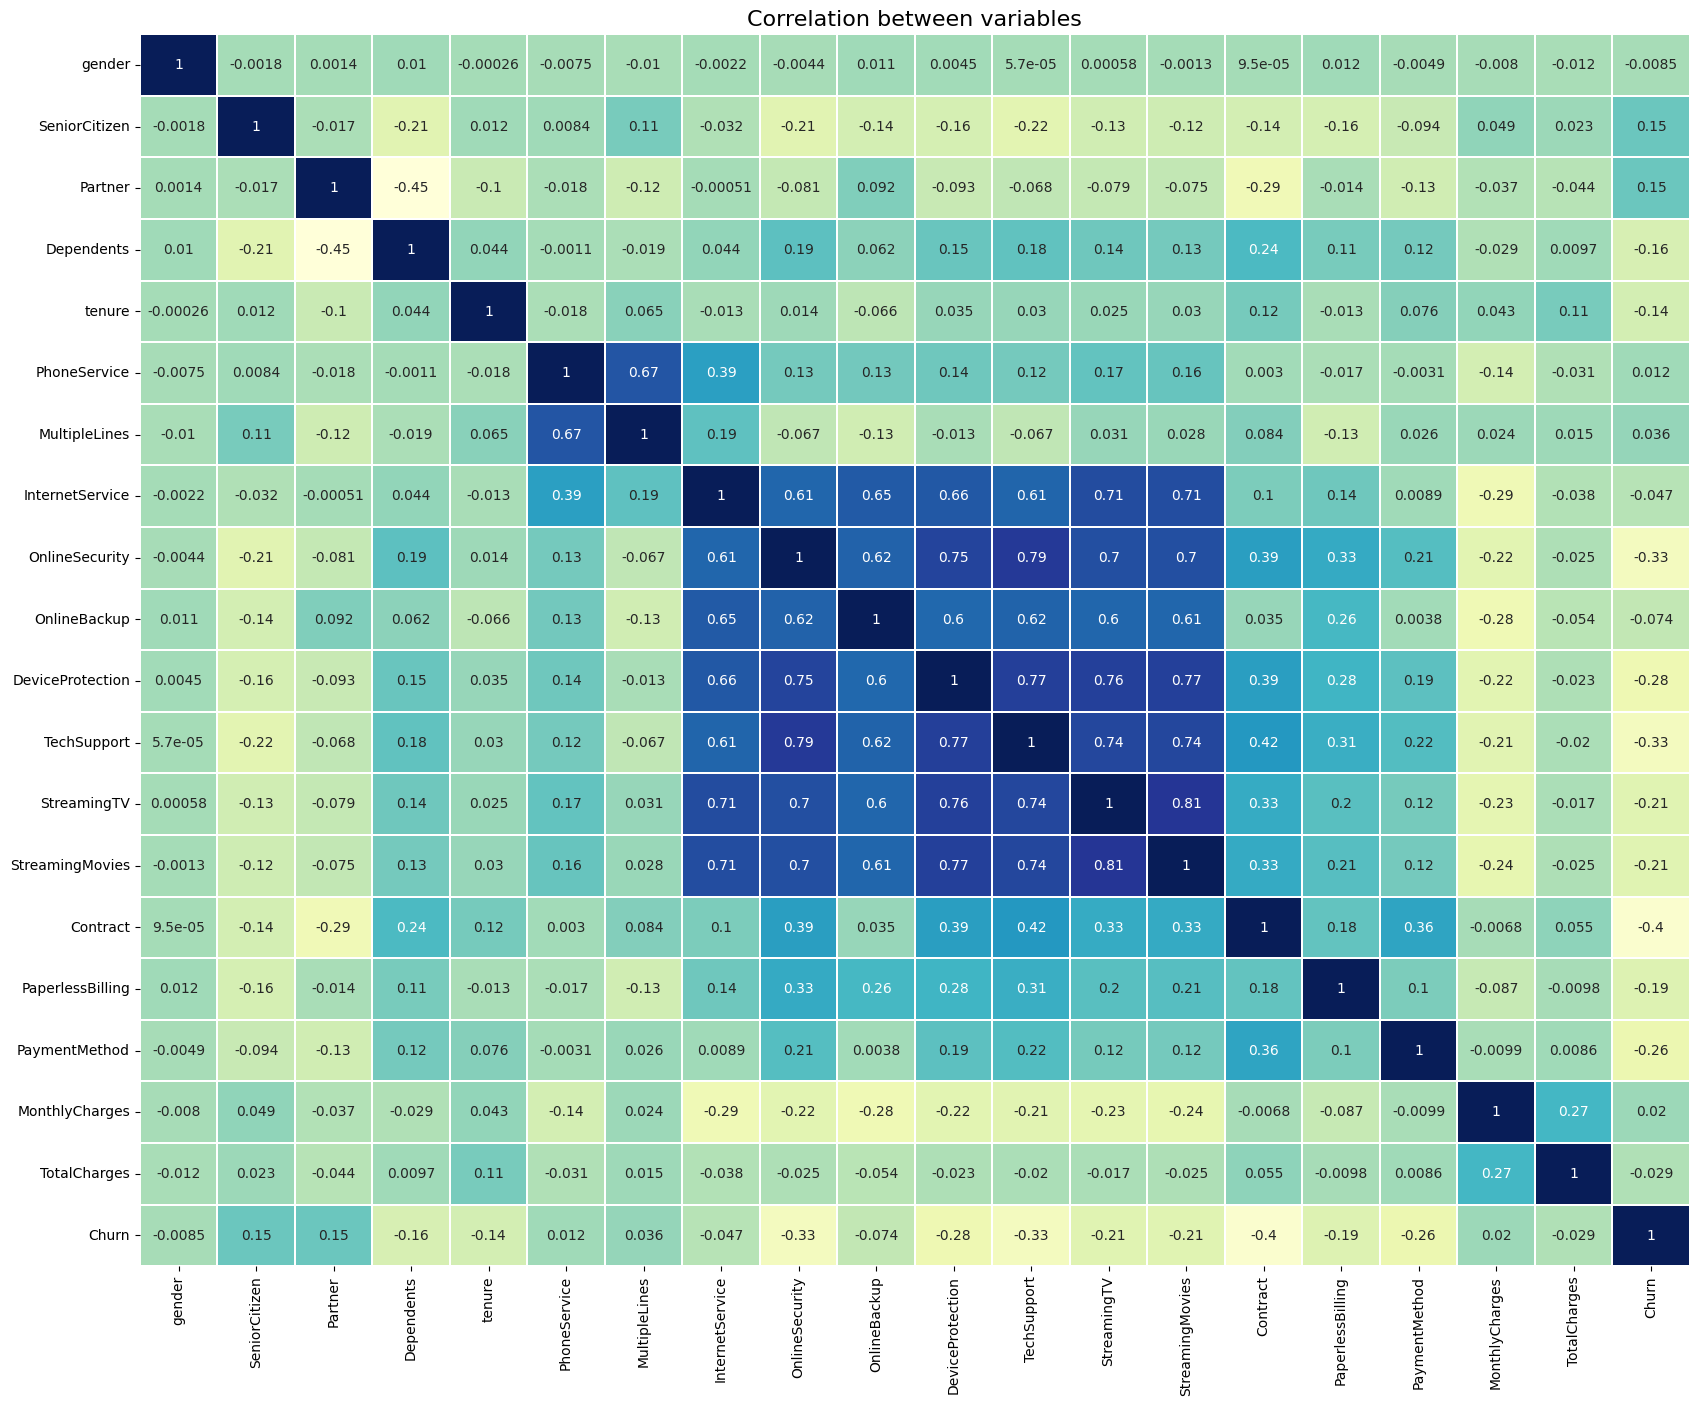

In [20]:
corrDf = df.apply(lambda x:pd.factorize(x)[0])

corr = corrDf.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr,linewidths=0.2,cmap='YlGnBu',annot=True,cbar=False,annot_kws={'fontsize':10})
plt.title('Correlation between variables',fontdict={'fontsize':16})
plt.show()

- The strong positive correlation between telephone services and multi-line services suggests that customers who have telephone services are more likely to also have multiple lines.
- The strong positive correlation between equipment protection, technical service support, online TV, and online movies suggests that customers who subscribe to one of these services are likely to subscribe to the others as well.

### 2.1.5 Correlation between whether telecom users churn and various variables

<Axes: >

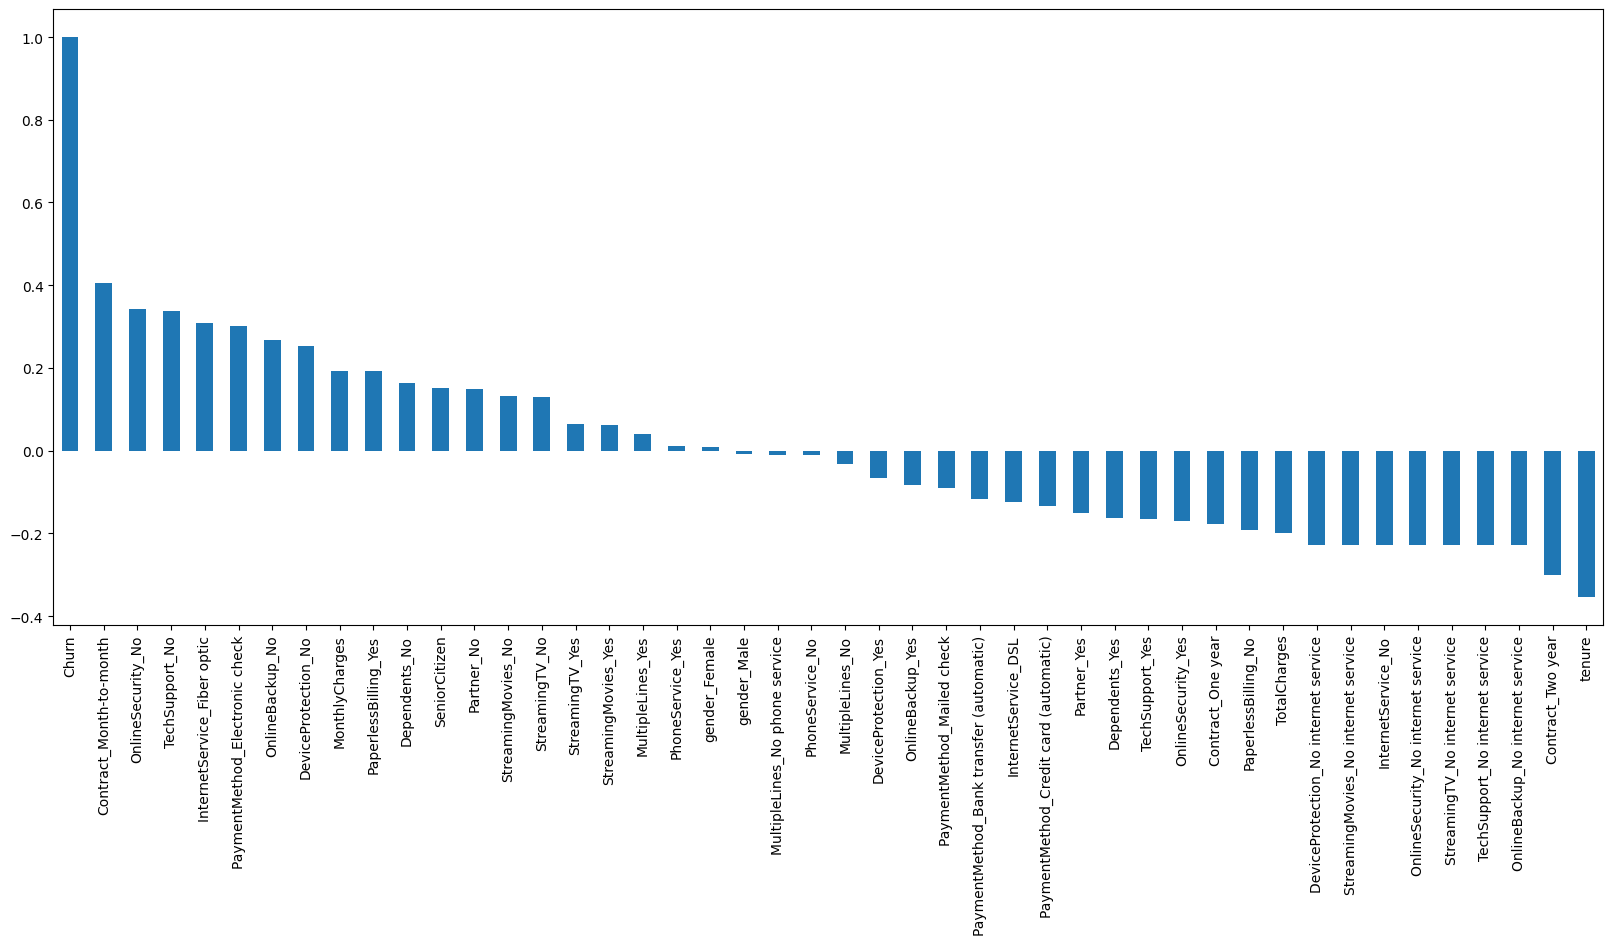

In [21]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The values of the **gender** and the **phone service** are close to 0, indicating that these two variables have a particularly small impact on the customer churn of telecommunications companies and can be ignored when conducting prediction studies.

### 2.1.6 The impact of *Online Security*, *Online Backup*, *Device Protection*, *Tech Support*, *Streaming TV*, *Streaming Movies* on churn rate.

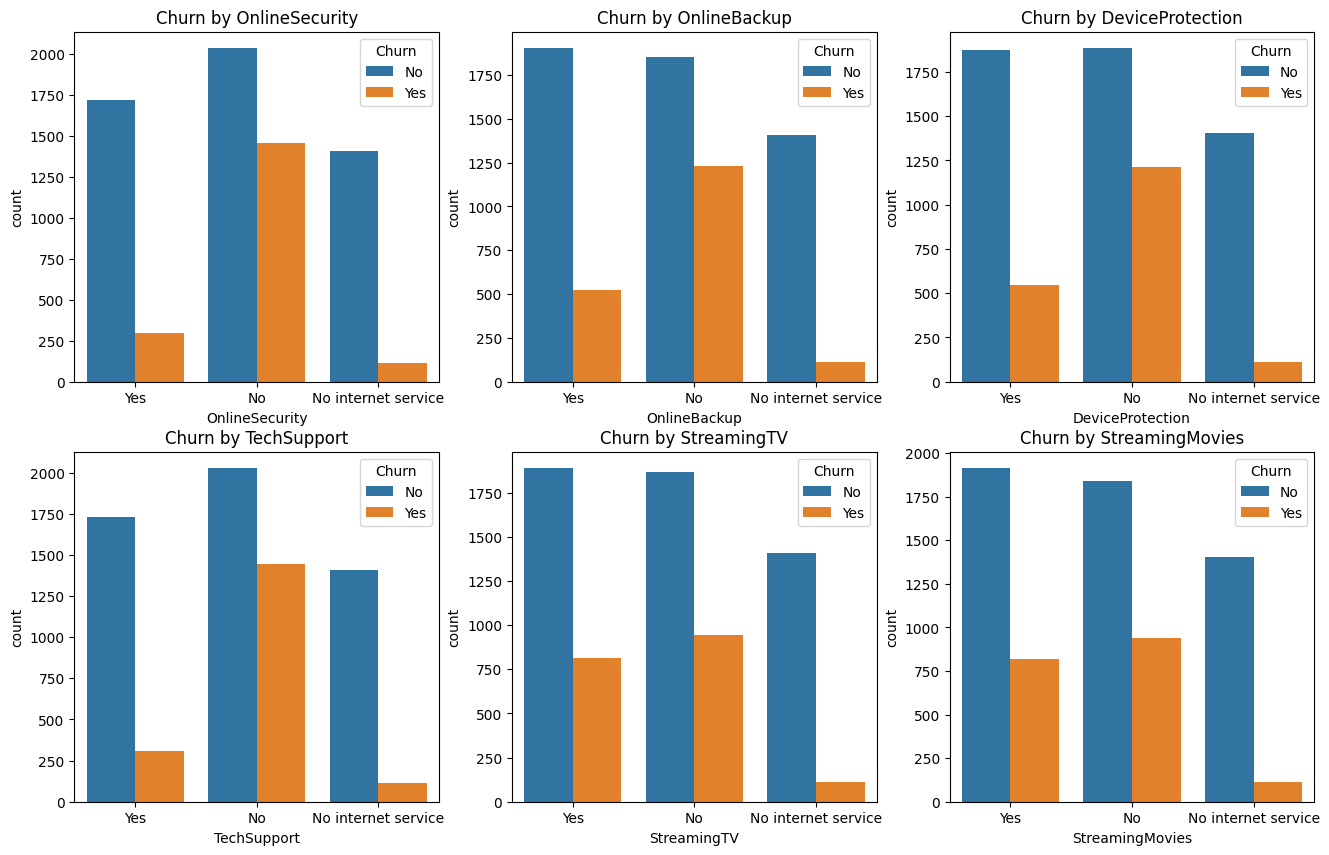

In [22]:
covariables = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
plt.figure(figsize=(16,10))
for i,item in enumerate(covariables,1):
    plt.subplot(2,3,i)
    sns.countplot(x=item,hue='Churn',data=df,order=['Yes','No','No internet service'])
    plt.title('Churn by '+str(item))
    i+=1
plt.show()

### 2.1.7 The impact of contract signing method on customer churn rate

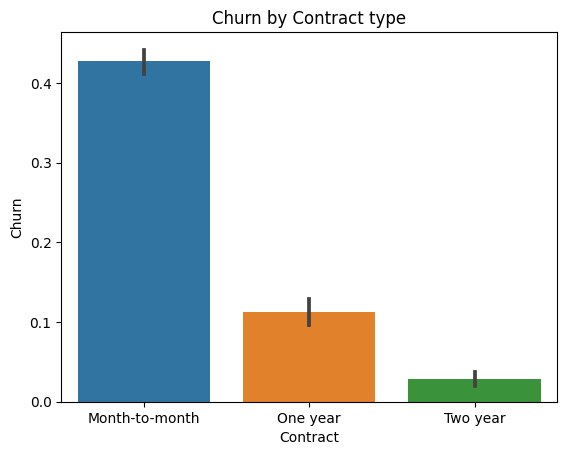

In [23]:
sns.barplot(x='Contract',y='Churn',data=df1)
plt.title('Churn by Contract type')
plt.show()

The impact of contract signing on the customer churn rate is: 

- month-to-month > one-year > two-year. 

This may indicate that setting long-term contracts is more effective in retaining existing customers.


### 2.1.8 The impact of payment methods on churn rates

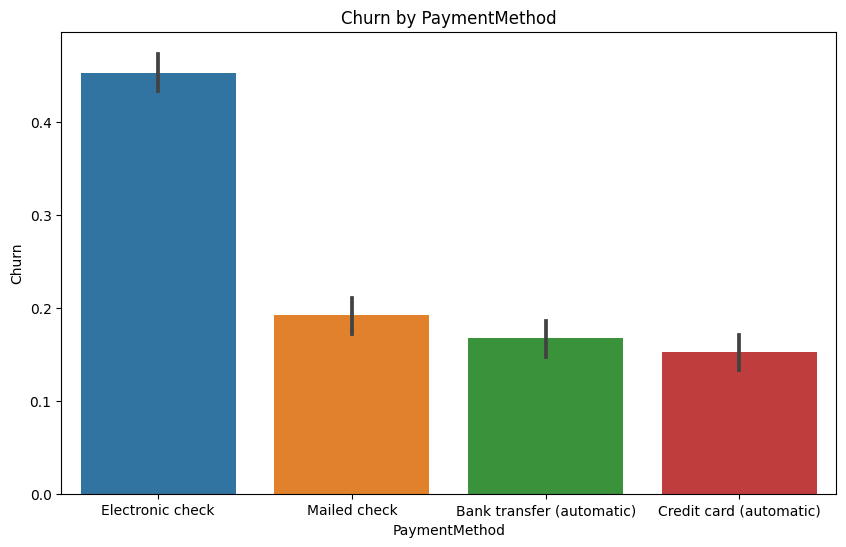

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='PaymentMethod',y='Churn',data=df1)
plt.title('Churn by PaymentMethod')
plt.show()

The Electronic check is the highest, while the other three payment methods are basically the same. Therefore, it can be inferred that the design of electronic bills affects the user experience.

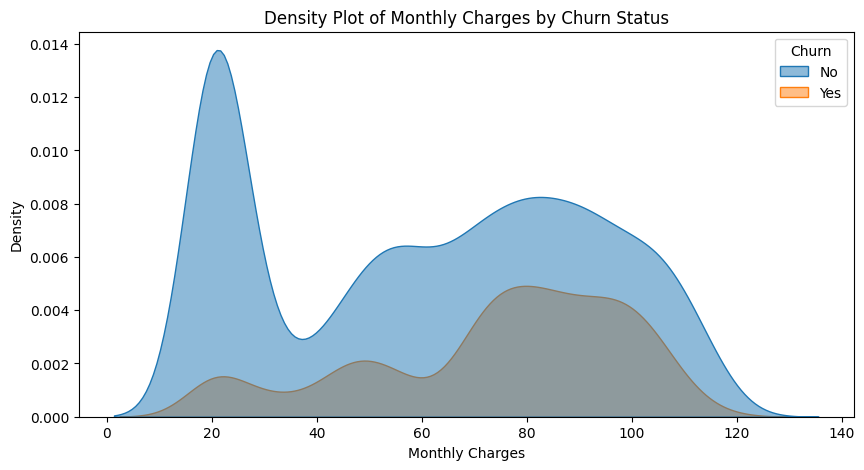

In [25]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5)
plt.title('Density Plot of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()


## 2.2 Feature engineering

### 2.2.1 Calculate LTV

In [26]:
# Calculate LVTt
df2 = df1.iloc[:,0:] 
df2['LTV'] = df2['MonthlyCharges'] * df2['tenure']
df2['AdjustedLTV'] = df2['LTV'] * (1 - df2['Churn'])

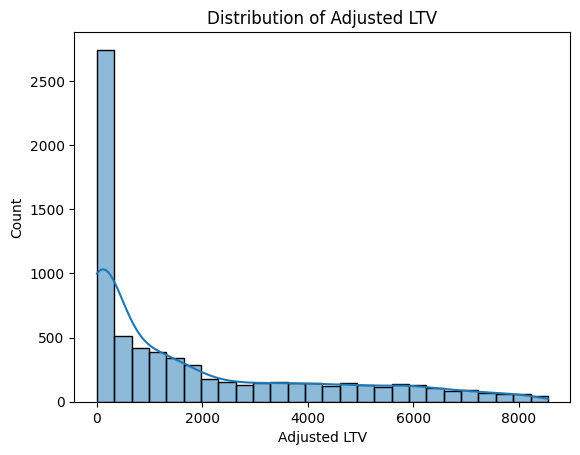

In [27]:
sns.histplot(df2['AdjustedLTV'], kde=True)
plt.title('Distribution of Adjusted LTV')
plt.xlabel('Adjusted LTV')
plt.show()

- The distribution of *Adjusted LTV* is right-skewed, indicating that most customers have a lower lifetime value with a long tail of customers having higher values.
- The peak near 0 suggests there are a significant number of customers with very low LTV. This could be due to customers who churn quickly or who have low monthly charges.
- The long tail towards the higher 'Adjusted LTV' values suggests that there are fewer customers who have a high lifetime value, which is expected as it's common for a smaller segment of customers to generate a larger portion of revenue.

### 2.2.1.1 Investigate Low LTV Customers:

In [28]:
# Find the 25th percentile of the Adjusted LTV
low_ltv_threshold = df2['AdjustedLTV'].quantile(0.25)
print(f"The 25th percentile of Adjusted LTV is: {low_ltv_threshold}")

The 25th percentile of Adjusted LTV is: 0.0


The 25th percentile of the Adjusted LTV is 0. This likely means that a significant number of customers either have no tenure (they churned immediately) or the MonthlyCharges were zero.

In [29]:
# Create a DataFrame of low LTV customers
low_ltv_customers = df2[df2['AdjustedLTV'] <= low_ltv_threshold]

In [30]:
# Descriptive statistics for low LTV customers
low_ltv_stats = low_ltv_customers.describe()

# Churn rate among low LTV customers
low_ltv_churn_rate = low_ltv_customers['Churn'].mean()
print(f"Churn rate among low LTV customers: {low_ltv_churn_rate}")

# Average tenure for low LTV customers
average_tenure_low_ltv = low_ltv_customers['tenure'].mean()
print(f"Average tenure for low LTV customers: {average_tenure_low_ltv}")

# Average monthly charges for low LTV customers
average_monthly_charges_low_ltv = low_ltv_customers['MonthlyCharges'].mean()
print(f"Average monthly charges for low LTV customers: {average_monthly_charges_low_ltv}")

# Explore other services for low LTV customers
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'StreamingTV']
for service in services:
    service_subscriptions = low_ltv_customers[service].value_counts(normalize=True) * 100
    print(f"Subscription rates for {service} among low LTV customers:\n{service_subscriptions}\n")


Churn rate among low LTV customers: 1.0
Average tenure for low LTV customers: 17.979133226324237
Average monthly charges for low LTV customers: 74.44133226324237
Subscription rates for PhoneService among low LTV customers:
PhoneService
Yes    90.904227
No      9.095773
Name: proportion, dtype: float64

Subscription rates for InternetService among low LTV customers:
InternetService
Fiber optic    69.395399
DSL            24.558587
No              6.046014
Name: proportion, dtype: float64

Subscription rates for OnlineSecurity among low LTV customers:
OnlineSecurity
No                     78.170144
Yes                    15.783842
No internet service     6.046014
Name: proportion, dtype: float64

Subscription rates for StreamingTV among low LTV customers:
StreamingTV
No                     50.401284
Yes                    43.552702
No internet service     6.046014
Name: proportion, dtype: float64



- It appears that all low LTV customers have churned.The low LTV is strongly associated with churn. It could also indicate that the low LTV customers did not stay long enough to generate significant revenue.
- The average tenure of approximately 18 months suggests that these customers did not stay long with the company. This duration is relatively short if you are looking at a telecom business where contracts are often longer, which could imply that efforts to extend customer tenure might improve LTV.
- An average of around $74.44 suggests that these customers might be on mid-tier plans, as they are not at the lowest end of the price spectrum. This might suggest that even customers on moderately priced plans are at risk of churning.

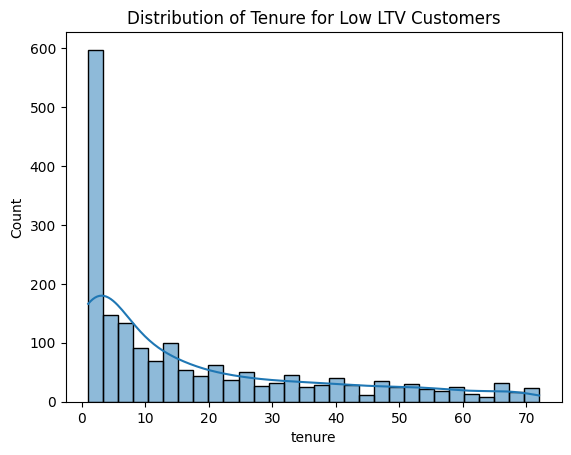

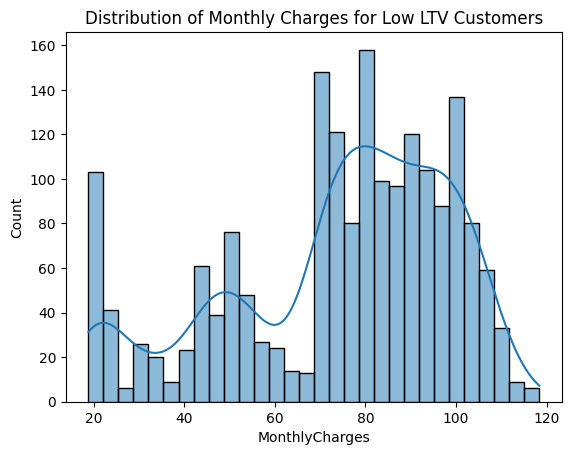

In [31]:
# Distribution of tenure for low LTV customers
sns.histplot(low_ltv_customers['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure for Low LTV Customers')
plt.show()

# Distribution of monthly charges for low LTV customers
sns.histplot(low_ltv_customers['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges for Low LTV Customers')
plt.show()


- The tenure histogram indicates that a large number of low LTV customers are new, with tenure less than 10 months. This could suggest that early engagement and onboarding processes are crucial areas to focus on for improving retention.
- The monthly charges histogram shows a wide distribution with several peaks, indicating no clear pattern in terms of service plans amongst the low LTV customers. There could be various reasons for churn that are not solely related to the pricing.

Suggestions:
- **Early Engagement:** Strengthening the customer onboarding process and early engagement could be critical in improving retention, especially for customers who are newly acquired.
- **Value-Added Services:** Offering or promoting value-added services such as Online Security could be another way to increase LTV and reduce churn.
- **Customer Feedback:** Collect and analyze feedback from customers who churn to understand their reasons for leaving.
- **Retention Offers:** Since even mid-tier customers are churning, consider creating targeted retention offers or loyalty programs for customers after a certain period of tenure.
- **Personalized Marketing:** Use personalized marketing to educate customers about the benefits of different service tiers and additional services to encourage upgrades or add-ons.


### 2.2.1.2 Explore High LTV Customers:

In [32]:
# Find the 75th percentile of the Adjusted LTV
high_ltv_threshold = df2['AdjustedLTV'].quantile(0.75)
print(f"The 75th percentile of Adjusted LTV is: {high_ltv_threshold}")

The 75th percentile of Adjusted LTV is: 3204.825


In [33]:
# Create a DataFrame of high LTV customers
high_ltv_customers = df2[df2['AdjustedLTV'] > high_ltv_threshold]

In [34]:
# Descriptive statistics for high LTV customers
high_ltv_stats = high_ltv_customers.describe()

# Explore other services for high LTV customers
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'StreamingTV']
for service in services:
    service_subscriptions = high_ltv_customers[service].value_counts(normalize=True) * 100
    print(f"Subscription rates for {service} among high LTV customers:\n{service_subscriptions}\n")

Subscription rates for PhoneService among high LTV customers:
PhoneService
Yes    94.937429
No      5.062571
Name: proportion, dtype: float64

Subscription rates for InternetService among high LTV customers:
InternetService
Fiber optic    62.059158
DSL            37.940842
Name: proportion, dtype: float64

Subscription rates for OnlineSecurity among high LTV customers:
OnlineSecurity
Yes    58.304892
No     41.695108
Name: proportion, dtype: float64

Subscription rates for StreamingTV among high LTV customers:
StreamingTV
Yes    71.046644
No     28.953356
Name: proportion, dtype: float64



- High LTV customers tend to subscribe to various services. A high percentage have PhoneService, and many have opted for fiber optic internet service. Subscription to OnlineSecurity and StreamingTV services is also notable, although there is a sizable proportion without OnlineSecurity. This indicates that high LTV customers value bundled services and are willing to pay for premium options.

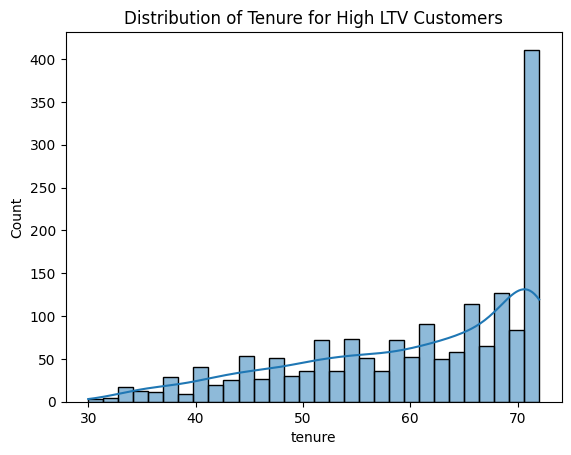

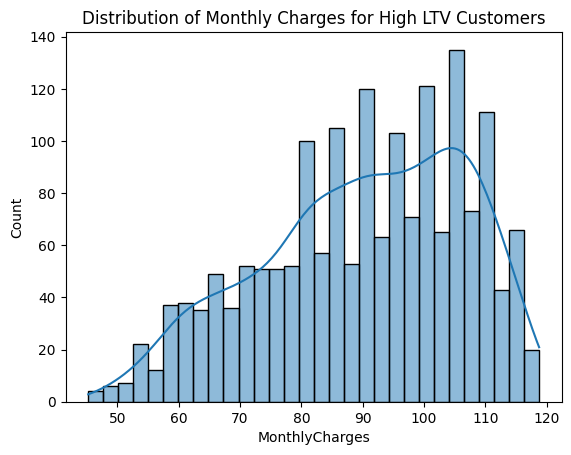

In [35]:
# Distribution of tenure for high LTV customers
sns.histplot(high_ltv_customers['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure for High LTV Customers')
plt.show()

# Distribution of monthly charges for high LTV customers
sns.histplot(high_ltv_customers['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges for High LTV Customers')
plt.show()

- The tenure distribution for high LTV customers has a large peak at the higher end, suggesting these customers have been with the company for a longer period. This aligns with expectations, as higher tenure usually correlates with higher LTV.
- The histogram for monthly charges shows a wide range of monthly charges among high LTV customers, with noticeable peaks in the mid to high range. This suggests that high LTV customers are not deterred by higher monthly charges and may be subscribing to more expensive plans or services.

- The high subscription rates for multiple services suggest that bundling is an effective strategy for increasing LTV. Customers who use more of the company's services tend to stay longer and contribute more to revenue.
  
- The tenure distribution underscores the importance of long-term customer relationships. Strategies that focus on customer retention can significantly impact LTV.
  
- High LTV customers appear to accept higher monthly charges, possibly due to perceived value or satisfaction with the services provided.

Suggestions:

- **Enhance Bundling Offers**: 
    Given the propensity for high LTV customers to subscribe to additional services, creating attractive bundling offers can encourage more customers to increase their usage of the company's services.

- **Loyalty Programs**: 
    Implement loyalty programs that reward long-term customers, encouraging them to maintain their relationship with the company.

- **Targeted Communication**: 
    Personalized communication highlighting the benefits of higher-tier plans or additional services can be effective for customers who are already contributing significantly to revenue.

- **Feedback and Improvement**: 
    Gather feedback from high LTV customers to understand what keeps them satisfied and use this information to improve service offerings.

- **Predictive Analytics**: 
    Use predictive analytics to identify which customers are likely to become high LTV based on early behavior, then target them with specific marketing campaigns or offers.

1. **High LTV Segment:**
   - Mean and median Adjusted LTV are relatively high, which indicates robust revenue from this group.
   - Churn mean is 0, suggesting that customers in this segment are currently retained.
   - The tenure is relatively high, with a mean around 54 months and a median of 57 months, indicating long-standing customer relationships.
   - The monthly charges mean and median are also the highest, which correlates with their high LTV.

2. **Low LTV Segment:**
   - Mean and median Adjusted LTV are very low.
   - Churn mean is approximately 0.80, which is quite high, showing that many have already churned or are at high risk of churning.
   - Tenure is low, with a mean around 14 months and a median of 5 months, which could be due to early churn.
   - Monthly charges are lower than the high segment but still above the medium segment.

3. **Medium LTV Segment:**
   - Adjusted LTV and monthly charges are in the middle range.
   - Churn rate is 0, which could indicate that these customers have not churned yet, or the data reflects a point in time before churn could occur.
   - The tenure mean and median are lower than the high LTV segment but higher than the low LTV segment, suggesting these customers are in the mid-range of their customer lifecycle.

The service usage rates further inform about the customer preferences and potential areas to focus on for upselling or improving retention:

- High LTV customers show high usage rates for additional services like OnlineSecurity and StreamingTV.
- Low and medium LTV customers show varied levels of service usage with notable portions not subscribing to any additional services.

**Actionable Insights and Strategies:**

- **For High LTV Customers:**
  - Maintain high-quality service to ensure continued satisfaction.
  - Develop loyalty programs and exclusive offers to reward their longevity and value.
  - Explore opportunities for further cross-selling or upselling, since they appear receptive to additional services.

- **For Low LTV Customers:**
  - Investigate the causes of high churn, which might be related to shorter tenures and possibly service dissatisfaction or pricing issues.
  - Develop targeted interventions such as welcome offers, educational onboarding about service benefits, or proactive support to encourage longer tenure and increased service usage.

- **For Medium LTV Customers:**
  - Since these customers have not churned and have medium tenure and monthly charges, they represent a good opportunity for growth.
  - Tailor marketing campaigns to promote additional services that high LTV customers frequently use.
  - Provide incentives or trial periods for additional services to increase their LTV.

## 2.2.2 Quantile transformation

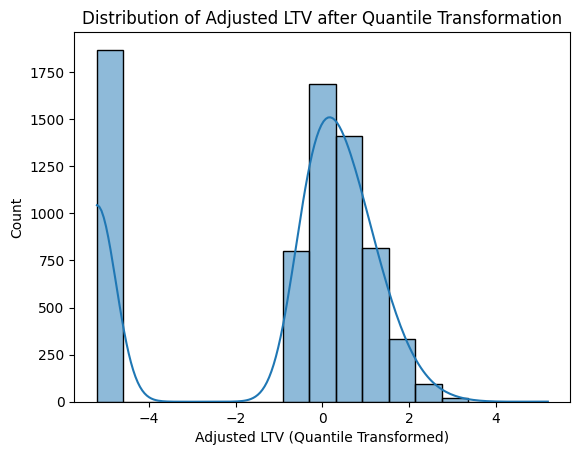

In [36]:
# from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
adjusted_ltv_transformed = qt.fit_transform(df2[['AdjustedLTV']])

df2['AdjustedLTV_Quantile'] = adjusted_ltv_transformed

sns.histplot(df2['AdjustedLTV_Quantile'], kde=True)
plt.title('Distribution of Adjusted LTV after Quantile Transformation')
plt.xlabel('Adjusted LTV (Quantile Transformed)')
plt.show()

# 3. Model Building

In [37]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   int64  
 6   gender_Male                              7032 non-null   int64  
 7   Partner_No                               7032 non-null   int64  
 8   Partner_Yes                              7032 non-null   int64  
 9   Dependents_No                            7032 non-null   int64  
 10  Dependents_Yes                           7032 non-nul

In [38]:
# Assume df_dummies is your dataframe and 'Churn' is your target variable
X = df_dummies.drop('Churn', axis=1)  # Features
y = df_dummies['Churn']  # Target

# Split the data into a training set and a test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3.1 Log Regression

In [39]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Print out the classification report and confusion matrix
print("The Classification Report: \n", classification_report(y_test, y_pred),f"\n")
print("The Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

The Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1027
           1       0.64      0.54      0.59       380

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407
 

The Confusion Matrix: 
 [[911 116]
 [173 207]]


The accuracy is low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

### 3.1.1 Resample

In [40]:
# Initializing SMOTE
sm = SMOTEENN()

# Fitting SMOTE to the training data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

y_train_sm.value_counts()
y_train_sm

0       0
1       0
2       0
3       0
4       0
       ..
4718    1
4719    1
4720    1
4721    1
4722    1
Name: Churn, Length: 4723, dtype: int64

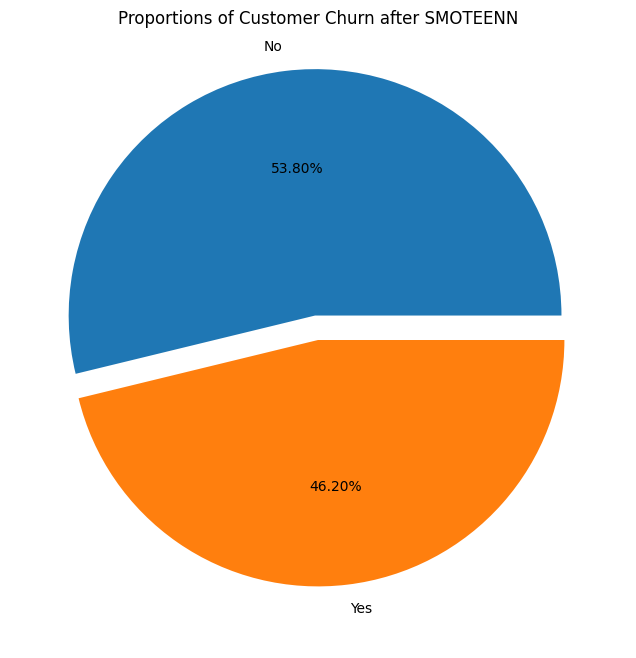

In [41]:
# Creating the bar chart
plt.figure(figsize=(8, 8))
plt.pie(y_train_sm.value_counts(), labels=df['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Proportions of Customer Churn after SMOTEENN')
plt.show()

In [42]:
# Split the data into a training set and a test set (80% train, 20% test)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_train_sm, y_train_sm, test_size=0.2)

# Fit the model on the training data with SMOTE
logreg.fit(Xr_train, yr_train)

# Predicting on the test set
yr_pred_sm = logreg.predict(Xr_test)

# Printing the classification report
print("The Classification Report: \n",classification_report(yr_test, yr_pred_sm))

The Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       421
           1       0.96      0.95      0.95       524

    accuracy                           0.95       945
   macro avg       0.95      0.95      0.95       945
weighted avg       0.95      0.95      0.95       945



## 3.2 Decision Tree

In [43]:
# Assuming Xr_train, yr_train, Xr_test, yr_test are already defined
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)

# Fit the model on the training data
model_dt.fit(Xr_train, yr_train)

# Predict on the test data
y_pred = model_dt.predict(Xr_test)

# Print the classification report
print("The Classification Report: \n", classification_report(yr_test, y_pred))

The Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       421
           1       0.96      0.94      0.95       524

    accuracy                           0.94       945
   macro avg       0.94      0.95      0.94       945
weighted avg       0.95      0.94      0.95       945



## 3.3 Random Forest

In [44]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(Xr_train,yr_train)
y_pred=model_rf.predict(Xr_test)
print("The Classification Report: \n", classification_report(yr_test, y_pred, labels=[0,1]))

The Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       421
           1       0.94      0.98      0.96       524

    accuracy                           0.95       945
   macro avg       0.95      0.95      0.95       945
weighted avg       0.95      0.95      0.95       945



## 3.4 XGBoost

In [45]:
model_xg = XGBClassifier()
model_xg.fit(Xr_train, yr_train)
y_pred=model_rf.predict(Xr_test)
print("The Classification Report of XGBoost: \n", classification_report(yr_test, y_pred, labels=[0,1]))

The Classification Report of XGBoost: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       421
           1       0.94      0.98      0.96       524

    accuracy                           0.95       945
   macro avg       0.95      0.95      0.95       945
weighted avg       0.95      0.95      0.95       945



## 3.5 Naive Bayes

In [46]:
model_nb = GaussianNB()
model_nb.fit(Xr_train, yr_train)
y_pred_nb = model_nb.predict(Xr_test)
print("The Classification Report for Naive Bayes: \n", classification_report(yr_test, y_pred_nb, labels=[0,1]))

The Classification Report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       421
           1       0.91      0.94      0.92       524

    accuracy                           0.91       945
   macro avg       0.91      0.91      0.91       945
weighted avg       0.91      0.91      0.91       945



## 3.6 SVC

In [47]:
model_svc = SVC()
model_svc.fit(Xr_train, yr_train)
y_pred_svc = model_svc.predict(Xr_test)
print("The Classification Report for SVC: \n", classification_report(yr_test, y_pred_svc, labels=[0,1]))


The Classification Report for SVC: 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       421
           1       0.79      0.73      0.76       524

    accuracy                           0.74       945
   macro avg       0.74      0.75      0.74       945
weighted avg       0.75      0.74      0.75       945



## 3.5 hyperparameter tuning

In [48]:
# Define the model
model_xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_distributions = {
    'max_depth': randint(3, 10), 
    'learning_rate': uniform(0.01, 0.2),  
    'n_estimators': randint(100, 1000),  
    'subsample': uniform(0.8, 0.2)  
}

random_search = RandomizedSearchCV(estimator=model_xg,
                                   param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(Xr_train, yr_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.9463987883622811; total time=   1.1s
[CV] END learning_rate=0.12973169683940733, max_depth=9, n_estimators=221, subsample=0.8311989040672406; total time=   0.7s
[CV] END learning_rate=0.14017769458977059, max_depth=7, n_estimators=869, subsample=0.944399754453365; total time=   2.1s
[CV] END learning_rate=0.13349630192554332, max_depth=4, n_estimators=121, subsample=0.8014132610439435; total time=   0.4s
[CV] END learning_rate=0.014612485008283152, max_depth=5, n_estimators=158, subsample=0.8799721943430512; total time=   0.8s
[CV] END learning_rate=0.019333132642723086, max_depth=6, n_estimators=882, subsample=0.8912139968434072; total time=   3.3s
[CV] END learning_rate=0.1284829137724085, max_depth=5, n_estimators=584, subsample=0.9215089703802877; total time=   1.5s
[CV] END learning_rate=0.04410482473745831, max_depth=9, n_estimators=

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f28d468c580>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f28d44810c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f28d44d5cf0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f28d44fb820>},
                   random_state=42, verbose=2)

In [49]:
print(random_search.best_params_)

{'learning_rate': 0.03818484499495253, 'max_depth': 9, 'n_estimators': 912, 'subsample': 0.8149101287359543}


In [50]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(Xr_test)
print("The Classification Report of XGBoost: \n", classification_report(yr_test, y_pred))

The Classification Report of XGBoost: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       421
           1       0.96      0.97      0.96       524

    accuracy                           0.96       945
   macro avg       0.96      0.96      0.96       945
weighted avg       0.96      0.96      0.96       945



### Summary Insights:
- **Correlation**: There is a moderate negative correlation between Adjusted LTV and churn. As Adjusted LTV increases, the likelihood of churn decreases.
- **High LTV Customers**: They typically have longer tenures, subscribe to multiple services including premium options like fiber optic internet, and are not deterred by higher monthly charges.
- **Low LTV Customers**: These customers have a high churn rate, suggesting that low LTV is associated with a greater propensity to leave the service. They tend to have shorter tenures and do not often subscribe to additional services.
- **Service Utilization**: High LTV customers often utilize a range of services, implying that service diversity is associated with higher customer value and retention.
- **Churn Rates**: There is a significant difference in the mean Adjusted LTV of customers who churn compared to those who don't, reinforcing the importance of LTV in predicting customer churn.

### Summary Actions to Consider:
- **Retention Efforts**: Prioritize retention efforts on customers with lower LTV by improving their experience or offering targeted incentives.
- **Service Bundling**: Encourage the use of bundled services or cross-sell additional services to customers, which seems to correlate with higher LTV.
- **Personalized Engagement**: Use customer data to create personalized engagement strategies for customers with different LTVs, focusing on those at risk of churning.
- **Predictive Analysis**: Leverage predictive analytics to preemptively identify customers at risk of churning and take proactive measures to retain them.
- **Loyalty Programs**: Develop loyalty programs that reward customers for longevity and high engagement with the service.
- **Feedback Loops**: Establish feedback loops with customers to understand their needs and preferences better, particularly focusing on high LTV customers to understand the drivers of satisfaction and retention.
- **Value-Based Segmentation**: Segment the customer base according to LTV and tailor marketing, sales, and service strategies to each segment’s characteristics and needs.